In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import sklearn

In [2]:
df= pd.read_csv('train.csv')
test_df =pd.read_csv('test.csv')
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(df.info())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#data preprocessing
#Age(176 NaN) and Cabin(687NaN) has null values
df[df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [8]:
df[['Age', 'Survived']].corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


In [9]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
test_df[(test_df['Fare'].isnull())]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
AGE = df['Age'].astype('float').mean()
df['Age']= df['Age'].replace(np.NaN, AGE)
AGE_Test = test_df['Age'].astype('float').mean()
test_df['Age']=df['Age'].replace(np.NaN, AGE_Test)
#pre-processing for age

In [12]:
FARE = test_df['Fare'].mode()
test_df['Fare'].fillna(7.75, inplace=True)
FARE

0    7.75
dtype: float64

In [13]:
test_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [14]:
df1 = df[['Cabin', 'Pclass']].dropna(subset=['Cabin'], axis=0)
print(df1['Pclass'].value_counts())
x= 176/(176+16+12)
print("the chance of cabin belonginf to class 1 is: " )
print(x*100)
#This shows that cabin data is basically available for people from class 1, and hence we cant make any guess from the same as
#cabin data with other values than NaN will basically mean Pclass=1

1    176
2     16
3     12
Name: Pclass, dtype: int64
the chance of cabin belonginf to class 1 is: 
86.27450980392157


In [15]:
#Dropping the Cabin column
df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [16]:
df.info()
df.columns
test_df.info()
#Data pre-processing is done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

In [17]:
#need to understand how each variable affects the target variable, first we understand which gender of which pclass had the 
#highest survival prob
df1 = df[['Sex', 'Pclass', 'Survived']]
df_grp = df1.groupby(['Pclass', 'Sex'], as_index=False).mean()
df_grp

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [18]:
#This shows that female from first class is most likely to survive
# Now let us see the age factor, lets categorize the age into few bins, age 0-6=toddler, 6-16=teenager 18-60=adult 60< =elders

In [19]:
group_names = [0,1,2,3,4,5,]
bins = [0, 15, 25, 35, 45, 55,  80]
df['Age_Binned'] = pd.cut(df['Age'], bins, labels= group_names, include_lowest=True)
test_df['Age_Binned'] = pd.cut(test_df['Age'], bins, labels=group_names, include_lowest=True)

In [20]:
df1 =df[['Age_Binned', 'Survived']]
df_grp = df1.groupby(['Age_Binned'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(df_grp)
df1['Age_Binned'].value_counts()


  Age_Binned  Survived
0          0  0.590361
4          4  0.412698
3          3  0.394737
2          2  0.361930
1          1  0.344037
5          5  0.300000


2    373
1    218
3    114
0     83
4     63
5     40
Name: Age_Binned, dtype: int64

In [21]:
# we see that elders age bracket(55-80) had the lowest chance of survival, and there after the most death occured with the
# my_age and adult1 group

In [22]:
#to categorize men and women better, we shall introduce dummy variables
dummy_variable1 = pd.get_dummies(df['Sex'])
dummy_variable2 = pd.get_dummies(test_df['Sex'])

In [23]:
df = pd.concat([df, dummy_variable1], axis=1)
test_df = pd.concat([test_df, dummy_variable2], axis=1)
test_df.drop('Sex', axis=1, inplace=True)
df.drop('Sex', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Binned,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,3,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,2,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,2,0,1


In [24]:
test_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Binned,female,male
0,892,3,"Kelly, Mr. James",22.0,0,0,330911,7.8292,Q,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",38.0,1,0,363272,7.0000,S,3,1,0
2,894,2,"Myles, Mr. Thomas Francis",26.0,0,0,240276,9.6875,Q,2,0,1
3,895,3,"Wirz, Mr. Albert",35.0,0,0,315154,8.6625,S,2,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",35.0,1,1,3101298,12.2875,S,2,1,0


In [25]:
df1=df[['SibSp', 'Survived']].groupby('SibSp', as_index= False).mean().sort_values(by='Survived', ascending=False)
df1

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
df1=df[['Parch', 'Survived']].groupby('Parch', as_index= False).mean().sort_values(by='Survived', ascending=False)
df1

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [27]:
df['Family']=df['Parch']+df['SibSp']
df[['Family', 'Survived']].groupby('Family', as_index=False).mean().sort_values(by='Survived', ascending=False)
df.drop(['Parch','SibSp'], axis=1, inplace=True)
test_df['Family']=test_df['Parch']+test_df['SibSp']
test_df.drop(['Parch','SibSp'], axis=1, inplace=True)

In [28]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,Age_Binned,female,male,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,S,1,0,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,3,1,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,S,2,1,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,S,2,1,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,S,2,0,1,0,Mr


In [30]:
df1=df[['Title', 'PassengerId']].groupby('Title').count()
df1

,PassengerId
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


In [31]:
df1=test_df[['Title', 'PassengerId']].groupby('Title').count()
df1

,PassengerId
Title,
Col,2
Dona,1
Dr,1
Master,21
Miss,78
Mr,240
Mrs,72
Ms,1
Rev,2


# 

In [32]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title']= df['Title'].replace('Mlle', 'Miss')
df['Title']= df['Title'].replace('Mme', 'Mrs')
df['Title']= df['Title'].replace('Ms', 'Miss')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [33]:
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test_df['Title']= test_df['Title'].replace('Mlle', 'Miss')
test_df['Title']= test_df['Title'].replace('Mme', 'Mrs')
test_df['Title']= test_df['Title'].replace('Ms', 'Miss')
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [34]:
df.drop(['Ticket', 'Name', 'Age'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Fare,Embarked,Age_Binned,female,male,Family,Title
0,1,0,3,7.2500,S,1,0,1,1,Mr
1,2,1,1,71.2833,C,3,1,0,1,Mrs
2,3,1,3,7.9250,S,2,1,0,0,Miss
3,4,1,1,53.1000,S,2,1,0,1,Mrs
4,5,0,3,8.0500,S,2,0,1,0,Mr


In [35]:
test_df.drop(['Ticket', 'Name', 'Age'], axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Fare         418 non-null    float64 
 3   Embarked     418 non-null    object  
 4   Age_Binned   418 non-null    category
 5   female       418 non-null    uint8   
 6   male         418 non-null    uint8   
 7   Family       418 non-null    int64   
 8   Title        418 non-null    object  
dtypes: category(1), float64(1), int64(3), object(2), uint8(2)
memory usage: 21.1+ KB


,Survived,Fare
Survived,1.000000,0.257307
Fare,0.257307,1.000000


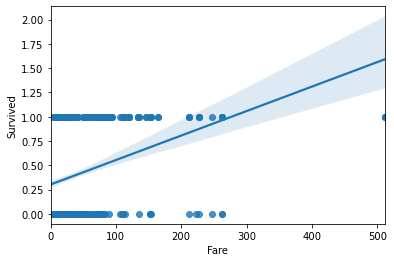

In [36]:
sns.regplot(x='Fare', y='Survived', data=df)
df[['Survived','Fare']].corr()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [38]:
le = LabelEncoder()
le2 = LabelEncoder()

le.fit(df['Title'].astype(str))
df['Title'] = le.transform(df['Title'].astype(str))

le.fit(df['Embarked'].astype(str))
df['Embarked'] = le.transform(df['Embarked'].astype(str))

le2.fit(test_df['Title'].astype(str))
test_df['Title'] = le2.transform(test_df['Title'].astype(str))

le2.fit(test_df['Embarked'].astype(str))
test_df['Embarked'] = le2.transform(test_df['Embarked'].astype(str))

In [63]:
lm = RandomForestClassifier()
X = df[['Pclass', 'female', 'male', 'Family', 'Age_Binned', 'Fare', 'Title', 'Embarked']]
Y = df['Survived']
lm.fit(X,Y)
lm.score(X,Y)

0.9483726150392817

In [64]:
Rcross =  cross_val_score(lm, X, Y, cv=10)
print('the R mean is',Rcross.mean(), ' The std of R is ', Rcross.std())

the R mean is 0.8013732833957553  The std of R is  0.040374809779952586


In [71]:
test_X = test_df[['Pclass', 'female', 'male', 'Family', 'Age_Binned', 'Fare', 'Title', 'Embarked']]
test_Y = lm.predict(test_X)
test_Y1 = pd.DataFrame(test_Y)


#group_names = [0,1]
#bins = [0, .5, 1.5]
#test_Y1[0] = pd.cut(test_Y1[0], bins, labels= group_names, include_lowest=True)

In [74]:
test_Y1.to_csv('file1.csv')